In [73]:
# ------------------------------------------------------------
# 🌧️ AI Rainfall & Crop Yield Data Analysis (data.gov.in)
# ------------------------------------------------------------
# Author: Atharva
# Goal: Compare rainfall & crop yield trends using real datasets
# ------------------------------------------------------------

import pandas as pd
import requests
import matplotlib.pyplot as plt

In [74]:
# ------------------------------------------------------------
# 🧠 Dataset Resource IDs from data.gov.in
# ------------------------------------------------------------
RAINFALL_ID = "6c05cd1b-ed59-40c2-bc31-e314f39c6971"
CROP_YIELD_ID = "936bddf5-d1a7-4127-a031-b07f5dcad2da"
BASE_URL = "https://api.data.gov.in/resource/"
API_KEY = "579b464db66ec23bdd000001855f0d4ba8cc4f3051505d3a6d80afd0"   

In [83]:
# ------------------------------------------------------------
# 🌧️ Fetch Rainfall Data Function
# ------------------------------------------------------------
def get_rainfall_for_state(state_name, limit=5000):
    from urllib import request
    import json

    # Data.gov.in resource details
    api_key = "YOUR_API_KEY_HERE"  # Replace with your key
    resource_id = "6c05cd1b-ed59-40c2-bc31-e314f39c6971"
    url = f"https://api.data.gov.in/resource/{resource_id}?api-key={api_key}&format=json&limit={limit}"

    # Fetch data
    with request.urlopen(url) as response:
        data = json.loads(response.read().decode())

    # Convert to DataFrame
    df = pd.DataFrame(data["records"])
    if df.empty:
        print(f"⚠️ No data fetched for {state_name}")
        return None

    # Convert numeric and filter
    df["Avg_rainfall"] = pd.to_numeric(df["Avg_rainfall"], errors="coerce")
    df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

    df = df[df["State"].str.contains(state_name, case=False, na=False)]

    if df.empty:
        print(f"⚠️ No data available for state: {state_name}")
        return None

    # Filter for last 5 years
    latest_year = int(df["Year"].max())
    last_5_years = list(range(latest_year - 4, latest_year + 1))
    df = df[df["Year"].isin(last_5_years)]

    return df  # returning dataframe instead of average



In [84]:
# ------------------------------------------------------------
# 🌽 Fetch Crop Yield Data Function
# ------------------------------------------------------------
def summarize_crop_yields():
    """Fetch and list top 10 crops by yield."""
    url = f"{BASE_URL}{CROP_YIELD_ID}?api-key={API_KEY}&format=json&limit=500"
    response = requests.get(url)
    data = response.json()

    df = pd.DataFrame(data.get("records", []))
    if df.empty:
        print("No crop yield data found.")
        return None

    # Identify correct columns
    if "yield_in_kg_hectare" in df.columns:
        df["yield_in_kg_hectare"] = pd.to_numeric(df["yield_in_kg_hectare"], errors="coerce")

        top_crops = df.sort_values(by="yield_in_kg_hectare", ascending=False).head(10)
        return top_crops[["crop_wise", "yield_in_kg_hectare"]]
    else:
        print("Yield column not found in dataset.")
        return None

In [85]:
# -------------------------------
# 💬 Compare Rainfall: Maharashtra vs Assam
# -------------------------------
print("❓ Compare average annual rainfall in Maharashtra and Assam for the last 5 years")

df_maha = get_rainfall_for_state("Maharashtra")
df_assam = get_rainfall_for_state("Assam")

if df_maha is not None and df_assam is not None:
    # Group by year and take yearly average rainfall
    maha_trend = df_maha.groupby("Year")["Avg_rainfall"].mean()
    assam_trend = df_assam.groupby("Year")["Avg_rainfall"].mean()

    # Print numeric results
    print("\n✅ Average Rainfall by Year (mm):")
    print(pd.DataFrame({"Maharashtra": maha_trend, "Assam": assam_trend}))

    # Overall 5-year averages
    maha_avg = maha_trend.mean()
    assam_avg = assam_trend.mean()
    print(f"\n✅ 5-Year Average: Maharashtra = {maha_avg:.2f} mm | Assam = {assam_avg:.2f} mm")

    # ------------------------------------------------------------
    # 📊 Visual: Rainfall Trend Comparison
    # ------------------------------------------------------------
    plt.figure(figsize=(8, 5))
    plt.plot(maha_trend.index, maha_trend.values, marker='o', label="Maharashtra", color='orange')
    plt.plot(assam_trend.index, assam_trend.values, marker='o', label="Assam", color='blue')
    plt.title("Average Annual Rainfall (Last 5 Years)")
    plt.xlabel("Year")
    plt.ylabel("Average Rainfall (mm)")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()
else:
    print("⚠️ Data missing for one or both states.")

❓ Compare average annual rainfall in Maharashtra and Assam for the last 5 years


HTTPError: HTTP Error 403: Forbidden


❓ List top 10 crops by yield for 2019-20

✅ Answer:
          crop_wise  yield_in_kg_hectare
25       Sugarcane                77893
1            Wheat                 3421
4            Maize                 2945
7           Barley                 2802
0             Rice                 2705
27            Jute                 2686
16       Groundnut                 2065
28           Mesta                 1993
8   Coarse Cereals                 1976
17      Castorseed                 1765


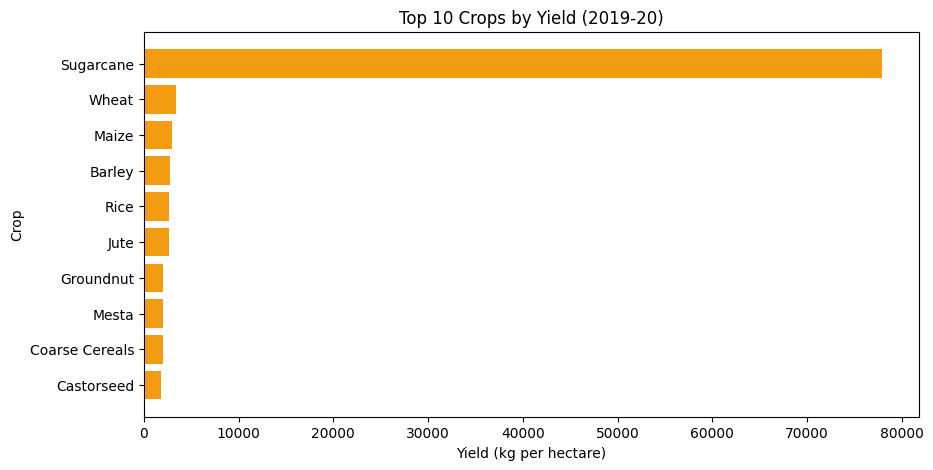

In [78]:
# ------------------------------------------------------------
# 🌾 Question 2 — Top 10 Crop Yields
# ------------------------------------------------------------
print("\n❓ List top 10 crops by yield for 2019-20")
top_crops = summarize_crop_yields()

if top_crops is not None:
    print("\n✅ Answer:\n", top_crops)

    # 📊 Visual: Bar Chart
    plt.figure(figsize=(10, 5))
    plt.barh(top_crops["crop_wise"], top_crops["yield_in_kg_hectare"], color="#f39c12")
    plt.gca().invert_yaxis()
    plt.title("Top 10 Crops by Yield (2019-20)")
    plt.xlabel("Yield (kg per hectare)")
    plt.ylabel("Crop")
    plt.show()

In [79]:
# ============================================================
# Question Handler
# ============================================================

def compare_rainfall(state1, state2):
    """
    Compare average rainfall between two states over last 5 years.
    """
    print(f"🔍 Fetching rainfall data for {state1} and {state2}...")
    avg1 = get_rainfall_for_state(state1)
    avg2 = get_rainfall_for_state(state2)

    if avg1 is None or avg2 is None:
        return "Data unavailable for one or both states."

    return {
        "answer": f"Average rainfall (last 5 years): {state1} = {avg1:.2f} mm, {state2} = {avg2:.2f} mm",
        "sources": [
            {"dataset": "Daily District-wise Rainfall Data", "resource_id": RAINFALL_ID}
        ]
    }


def summarize_crop_yields():
    """
    Display top 10 crops by yield for 2019-20.
    Uses 'crop_wise' and 'yield_in_kg_hectare' columns.
    """
    df = get_crop_yield_summary()
    if df is None or df.empty:
        return "No data available."

    # Clean column names
    df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

    # Explicitly select correct columns
    crop_col = "crop_wise"
    yield_col = "yield_in_kg_hectare"

    # Convert to numeric for sorting
    df[yield_col] = pd.to_numeric(df[yield_col], errors="coerce")

    # Sort and take top 10
    top_crops = (
        df.sort_values(by=yield_col, ascending=False)
          .head(10)[[crop_col, yield_col]]
    )

    return {
        "answer": top_crops,
        "sources": [
            {"dataset": "All India Crop Yield Estimates (2019-20)", "resource_id": CROP_ID}
        ]
    }


In [80]:
# ============================================================
# Example Usage
# ============================================================

# Example 1: Compare rainfall
question1 = "Compare average annual rainfall in Maharashtra and Karnataka for the last 5 years"
print("❓", question1)
answer1 = compare_rainfall("Maharashtra", "Karnataka")
print("\n✅ Answer:\n", answer1)

# Example 2: Top 10 crop yields
question2 = "List top 10 crops by yield for 2019-20"
print("\n❓", question2)
answer2 = summarize_crop_yields()
print("\n✅ Answer:\n", answer2["answer"])

❓ Compare average annual rainfall in Maharashtra and Karnataka for the last 5 years
🔍 Fetching rainfall data for Maharashtra and Karnataka...
✅ Found 1306 records for Maharashtra, Avg rainfall = 5.16 mm
⚠️ No data available for state: Karnataka

✅ Answer:
 Data unavailable for one or both states.

❓ List top 10 crops by yield for 2019-20

✅ Answer:
          crop_wise  yield_in_kg_hectare
25       Sugarcane                77893
1            Wheat                 3421
4            Maize                 2945
7           Barley                 2802
0             Rice                 2705
27            Jute                 2686
16       Groundnut                 2065
28           Mesta                 1993
8   Coarse Cereals                 1976
17      Castorseed                 1765
